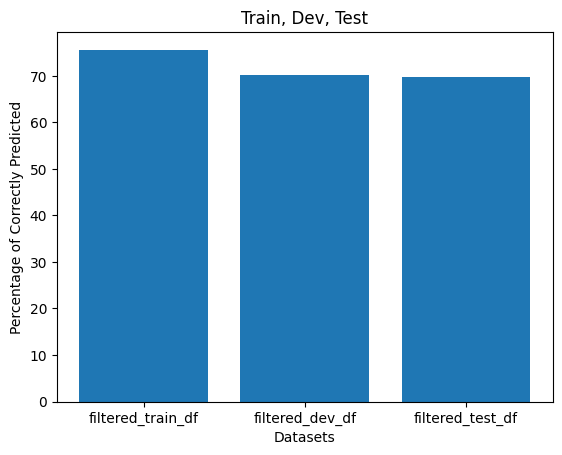

In [2]:
import pandas as pd

#-------------------------------------------------------------------------------
#Chargement des DF à partir des fichiers excels
filtered_train_df = pd.read_csv('filtered_train.csv')
# filtered_train_df
filtered_dev_df = pd.read_csv('filtered_dev.csv')
# filtered_dev_df
filtered_test_df = pd.read_csv('filtered_test.csv')
# filtered_test_df


# Calculate the percentage of correct predictions
names_df = [filtered_train_df, filtered_dev_df, filtered_test_df]
names_df_string = ["filtered_train_df", "filtered_dev_df", "filtered_test_df"]
percentage_of_true_table = []
for name in names_df:
    percentage_of_true_table.append(100 * name['correct_predicted'].value_counts()[True] / name.shape[0])

# print(percentage_of_true_table) #[30.14526103840069, 30.278655558747488, 69.62792039226997]
#Bar plot
import matplotlib.pyplot as plt

#Create a bar plot of the 'char_error_rate' column
plt.bar(names_df_string, percentage_of_true_table)

# Add x and y labels
plt.xlabel('Datasets')
plt.ylabel('Percentage of Correctly Predicted')

# Add title
plt.title('Train, Dev, Test')

# Show the plot
plt.show()


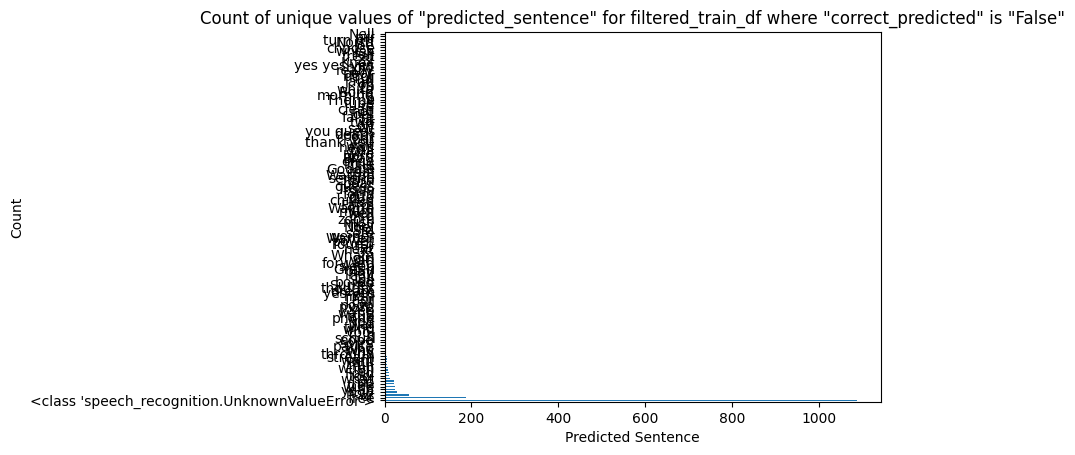

In [7]:
# filtered_train_df
# filter the dataframe
filtered_train_df_false = filtered_train_df[filtered_train_df['correct_predicted'] == False]
filtered_train_df_false

# Count the unique values of predicted_sentence
predicted_sentence_counts = filtered_train_df_false['predicted_sentence'].value_counts()

# Create the bar chart
predicted_sentence_counts.plot(kind='barh')

# Add x and y labels
plt.xlabel('Predicted Sentence')
plt.ylabel('Count')

# Add a title
plt.title('Count of unique values of "predicted_sentence" for filtered_train_df where "correct_predicted" is "False"')

# Show the plot
plt.show()

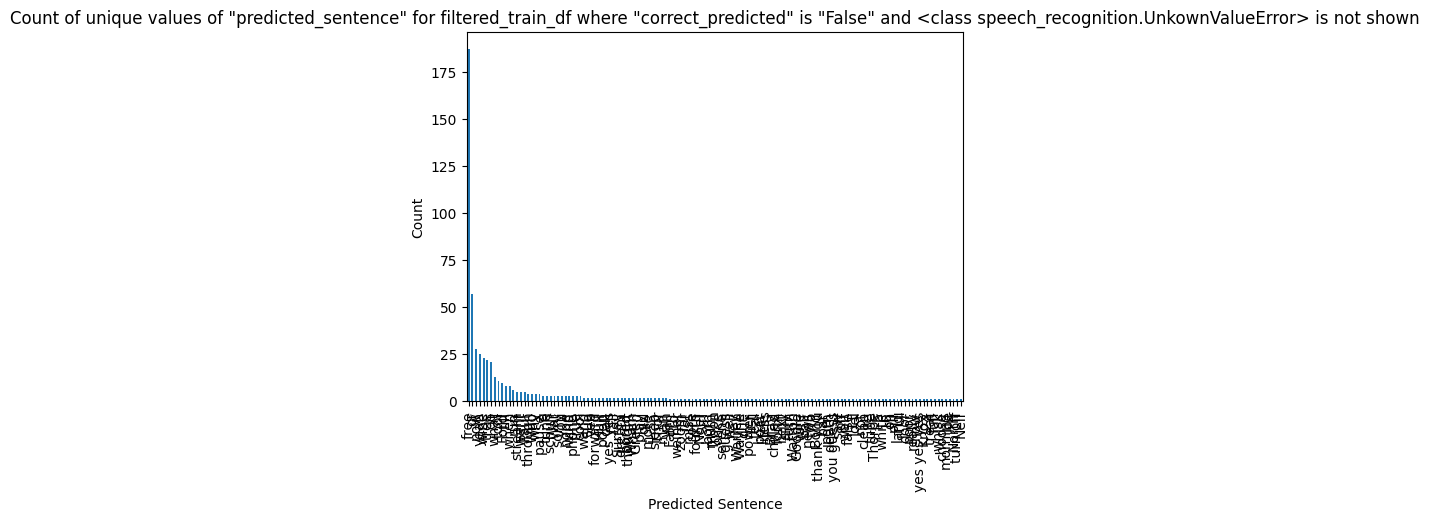

array(['stream', 'morning', 'yeah', 'b', 'what', 'Thorpe', 'girl', 'Ford',
       'free', 'tube', 're', 'tool', 'wine', 'van', 'sleep', 'Who',
       'clean', 'not', 'play', 'Joel', 'phone', 'or', 'do', '11', 'pause',
       'tree', 'wait', 'two', 'Green', 'nope', 'when', 'tune', 'Wham',
       'want', 'off', 'saw', '33', 'you guess', 'till', 'why', 'death',
       'forward', 'porn', 'run', 'now', 'Paul', 'bar', 'Sue', 'War',
       'yep', 'through', 'thank you', 'Bond', 'white', 'poop', 'call',
       'schuh', '10', 'q', 'cool', 'oh', 'wind', 'pill', 'turn off',
       'North', 'Joe', 'ball', 'choose', 'whisk', 'full', 'Surrey',
       'fall', 'wang', 'treat', 'true', 'bored', 'yes yes', '22', 'Knox',
       'yes yes yes', 'how', 'really', 'man', 'poor', 'door', 'TUI',
       'land', 'Thor', 'more', 'false', 'news', 'chilled', 'wire', 'Pro',
       'you', 'zoom', 'miss', 'sore', 'Noel', 'Siri', 'far', 'weiner',
       'fourth', 'Farm', 'thought', 'born', 'once', 'little', 'dream',
   

In [10]:
# Filter out rows with <class 'speech_recognition.UnkownValueError'>
filtered_train_df_false = filtered_train_df_false[filtered_train_df_false['predicted_sentence'] != "<class 'speech_recognition.UnknownValueError'>"]

# Count the unique values of predicted_sentence
predicted_sentence_counts = filtered_train_df_false['predicted_sentence'].value_counts()

# Create the bar chart
predicted_sentence_counts.plot(kind='bar')

# Add x and y labels
plt.xlabel('Predicted Sentence')
plt.ylabel('Count')

# Add a title
plt.title('Count of unique values of "predicted_sentence" for filtered_train_df where "correct_predicted" is "False" and <class speech_recognition.UnkownValueError> is not shown')

# Show the plot
plt.show()
unique_predicted_sentences = filtered_train_df_false['predicted_sentence'].unique()
unique_predicted_sentences

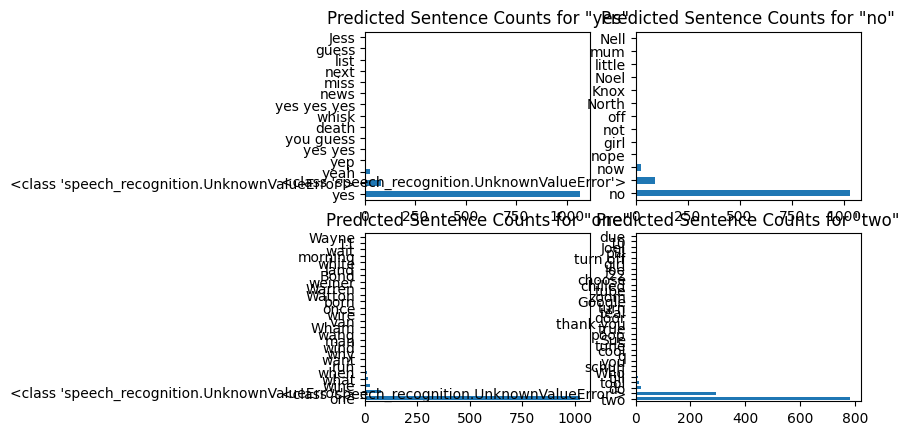

In [12]:
answers = ["yes", "no", "one", "two", "three", "four"]

# Create a dictionary to store the DataFrames
answer_dfs = {}

# Iterate over the answers
for answer in answers:
    # Create a DataFrame for the current answer
    answer_dfs[answer] = filtered_train_df[filtered_train_df['sentence'] == answer]
    
# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 2,figsize=(15,15))

# Iterate over the subplots and the answers
for ax, answer in zip(axs.flat, answers):
    # Count the unique values of predicted_sentence for the current answer
    predicted_sentence_counts = answer_dfs[answer]['predicted_sentence'].value_counts()
    
    # Create a bar chart of the count of unique values of "predicted_sentence"
    predicted_sentence_counts.plot(ax=ax, kind='barh')
    
    # Add a title to the subplot
    ax.set_title(f'Predicted Sentence Counts for "{answer}"')
    
# Show the plot
plt.show()
